# Team : It's FaceTime 



## Patil Bhavesh Vasant | 18D170023
## Anuj Agrawal | 180110012

## Installing the requied libraries in google colab

In [ ]:
!pip install -U insightface 
!pip install mxnet-cu101
!pip3 install onnxruntime

     |████████████████████████████████| 431 kB 7.3 MB/s 
     |████████████████████████████████| 12.3 MB 184 kB/s 
     |████████████████████████████████| 631 kB 66.0 MB/s 
  Created wheel for insightface: filename=insightface-0.5-cp37-cp37m-linux_x86_64.whl size=975562 sha256=354b5bb30ccb9bd796ab76291b511d693b5e826cb01ef723bdc619d61f963fed
  Stored in directory: /root/.cache/pip/wheels/10/41/10/d7c3a6acc5896f7e5ebdeb0456579bc6e1dce43bf4920f23a4
  Created wheel for imgaug: filename=imgaug-0.2.6-py3-none-any.whl size=654020 sha256=f41d12f1f93489e0936c533a9c241440ff39d7d4e9711cc280dfbeee6496238e
  Stored in directory: /root/.cache/pip/wheels/89/72/98/3ebfdba1069a9a8eaaa7ae7265cfd67d63ef0197aaee2e5f9c
Successfully built insightface imgaug
  Attempting uninstall: imgaug
    Found existing installation: imgaug 0.2.9
    Uninstalling imgaug-0.2.9:
      Successfully uninstalled imgaug-0.2.9
     |████████████████████████████████| 356.7 MB 26 kB/s 
  Attempting uninstall: graphviz
    Found e

## Mounting the google drive in order to fetch the data from drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive') 

Mounted at /content/drive


## Shifting to the dataset path

In [ ]:
%cd /content/drive/MyDrive/AI_hackthon/ES_FaceMatch_Dataset/

/content/drive/.shortcut-targets-by-id/1jVtyGeVkD0wuaIwqQ0-8rkJz8KDKIeOk/ES_FaceMatch_Dataset


In [20]:
!ls

shell-init: error retrieving current directory: getcwd: cannot access parent directories: No such file or directory
dataset_images	test.csv  train.csv


## Importing the required library

In [ ]:
import insightface
from insightface.app import FaceAnalysis
import cv2
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from time import time
import os, shutil
import pickle
import mxnet as mx 
from google.colab.patches import cv2_imshow
from PIL import Image

In [ ]:
class FaceRecognizer():
  def __init__(self):
    """
      Constructor method that loads the insightface arcface pretrained model to calculate face embeddings

      Params: None

      Returns: Nothing
    """
    self.model = FaceAnalysis()
    self.model.prepare(ctx_id=0) 
    #mx.gpu(0).empty_cache()


  def get_threshold(self, train_csv_path, img_folder):
    """
    A method that is employed to check the cosine score for matching faces as well as non-matching faces in order to analyse cosine score distribution

    params:
      train_csv_path: Path to the training csv file (i.e. train.csv)
      img_folder: Path to the folder containing images (i.e. dataset_images)

    Returns: 1-D Numpy array of the cosine scores of matching faces and non-matching faces respectively
    """

    train_csv = pd.read_csv(train_csv_path)

    threshold = 0
    matching_faces = 0

    matching_emb = []
    unmatching_emb = []

    for i in range(5000):

      im1 = cv2.imread(img_folder + train_csv['image1'][i]) 
      im2 = cv2.imread(img_folder + train_csv['image2'][i])

      face1 = self.model.get(im1)
      face2 = self.model.get(im2)

      if train_csv['label'][i] == 1:
      
        if len(face1) != 0 and len(face2) != 0:
          matching_emb.append(np.inner(face1[0].normed_embedding, face2[0].normed_embedding))

      else:
        
        if len(face1) != 0 and len(face2) != 0:
          unmatching_emb.append(np.inner(face1[0].normed_embedding, face2[0].normed_embedding))

      
    matching_emb = np.asarray(matching_emb)
    unmatching_emb = np.asarray(unmatching_emb)

    return matching_emb, unmatching_emb

  def analyse(self, train_csv_path, img_folder):
    """"
    Prints the minimum, maximum and average cosine score for matching as well non-matching faces

    params:
      train_csv_path: Path to the training csv file (i.e. train.csv)
      img_folder: Path to the folder containing images (i.e. dataset_images)

    Returns: 1-D Numpy array of the cosine scores of matching faces and non-matching faces respectively
    """

    emb_mul_list = []
    matching_emb, unmatching_emb = self.get_threshold(train_csv_path, img_folder) 
    print('For matching embeddings: ')
    print('Max: {} | Min: {} | Avg: {}'.format(np.max(matching_emb), np.min(matching_emb), np.mean(matching_emb)))
    print('-'*25)
    print('For not matching embeddings: ')
    print('Max: {} | Min: {} | Avg: {}'.format(np.max(unmatching_emb), np.min(unmatching_emb), np.mean(unmatching_emb)))  
    return matching_emb, unmatching_emb 

## Initializing the instance of the FaceRecognizer class

In [ ]:
app = FaceRecognizer()

# l: embedding cosine score for matching faces
# m: embedding cosine score for non-matching faces
l, m = app.analyse('train.csv', 'dataset_images/')                                             

Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/1k3d68.onnx landmark_3d_68 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/2d106det.onnx landmark_2d_106 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/det_10g.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/genderage.onnx genderage ['None', 3, 96, 96] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/w600k_r50.onnx recognition ['None', 3, 112, 112] 127.5 127.5
set det-size: (640, 640)
For matching

# Observation:


## Here are cosine scores:

### -> For matching face embeddings: 

##### Max: 0.8004854321479797 | Min: -0.034294914454221725 | Avg: 0.46671390533447266

### -> For non-matching face embeddings: 

##### Max: 0.3817419409751892 | Min: -0.19673213362693787 | Avg: 0.020499296486377716

In [ ]:
matching_scores, unmatching_scores = l, m

In [ ]:
match_scores, unmatch_scores = np.asarray(matching_scores), np.asarray(unmatching_scores)

## Histogram of the cosine scores of matching embeddings 

(array([  6.,   9.,  43.,  85., 199., 339., 329., 256., 117.,  17.]),
 array([-0.03429491,  0.04918312,  0.13266115,  0.21613918,  0.29961723,
         0.38309526,  0.4665733 ,  0.55005133,  0.63352937,  0.7170074 ,
         0.80048543], dtype=float32),
 <a list of 10 Patch objects>)

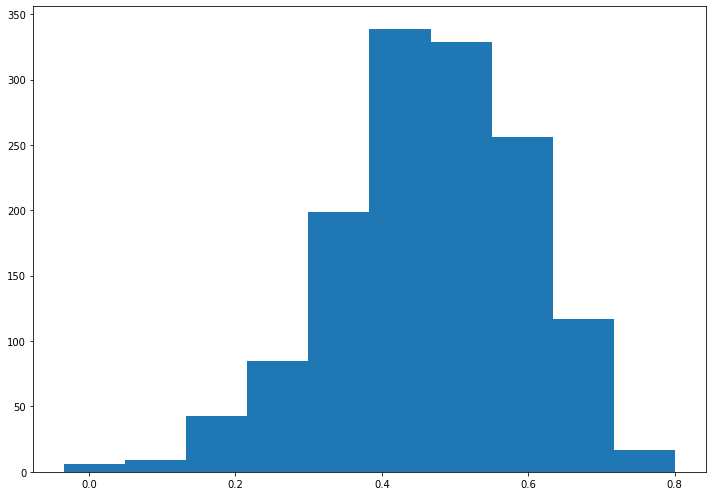

In [ ]:
fig, axs = plt.subplots(1, 1,
                        figsize =(10, 7),
                        tight_layout = True)
 
axs.hist(matching_scores, bins = 10)

## Histogram of the cosine scores of non-matching embeddings 

(array([ 21., 155., 497., 766., 539., 280.,  84.,  22.,   6.,   3.]),
 array([-0.19673213, -0.13888472, -0.08103732, -0.02318991,  0.0346575 ,
         0.0925049 ,  0.15035231,  0.20819972,  0.26604712,  0.32389453,
         0.38174194], dtype=float32),
 <a list of 10 Patch objects>)

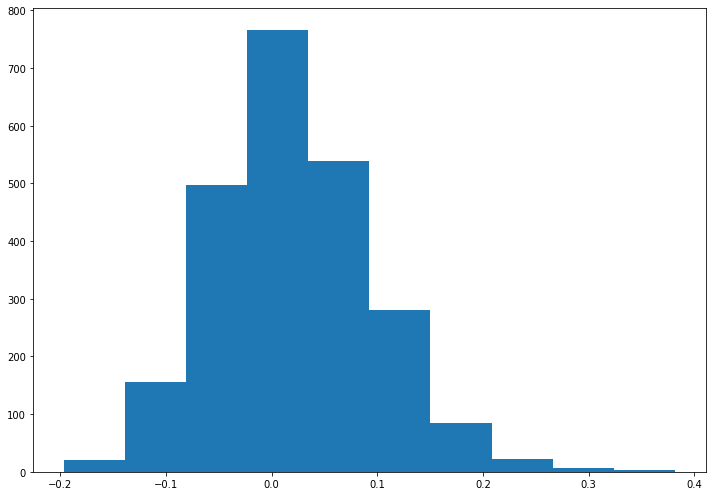

In [ ]:
fig, axs = plt.subplots(1, 1,
                        figsize =(10, 7),
                        tight_layout = True)
 
axs.hist(unmatching_scores, bins = 10)

## Analysis and conclusion:

#### From the histogram plot we come to the conclusion that for given faces distribution optimal differentiating cosine score lies somewhere close to 0.2 

#### Hence we choose 0.2 as a threshold to differentiate between the matching and non-matching faces

If threshold >= 0.2 --> face is mathcing
else --> face is not matching

In [ ]:
class FaceMatch():
  def __init__(self):
    """
      Constructor method that loads the insightface arcface pretrained model to calculate face embeddings

      Params: None

      Returns: Nothing
    """
    self.model = FaceAnalysis()
    self.model.prepare(ctx_id=0) 
    #mx.gpu(0).empty_cache()


  def predict(self, test_csv_path, img_folder, threshold = 0.2):
    """
    Method which calculates cosine score for face embeddings with arcface and predicts the label for test images if the faces are matching or not

    Params: 
      test_csv_path : Path for test csv file (i.e. test.csv)
      img_folder : Path for folder containing images (i.e. dataset_images/)

    Returns: pandas dataframe with label prediction for test.csv
    """

    test_csv = pd.read_csv(test_csv_path)

    label = [] 

    for i in range(len(test_csv)):

      im1 = cv2.imread(img_folder + test_csv['image1'][i]) 
      im2 = cv2.imread(img_folder + test_csv['image2'][i])

      face1 = self.model.get(im1)
      face2 = self.model.get(im2)

      if len(face1) != 0 and len(face2) != 0:
        cosine_dist = np.inner(face1[0].normed_embedding, face2[0].normed_embedding)

        if cosine_dist > threshold:
          label.append(1)
        else:
          label.append(0)

      else:
        label.append(0)      


    test_csv['label_pred'] = label 

    return test_csv         

### Instanciating the FaceMatch class and getting predictions for test.csv

In [7]:
app = FaceMatch()
test_results = app.predict('test.csv', 'dataset_images/')   

download_path: /root/.insightface/models/buffalo_l


100%|██████████| 281857/281857 [00:06<00:00, 46967.47KB/s]


Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/1k3d68.onnx landmark_3d_68 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/2d106det.onnx landmark_2d_106 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/det_10g.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/genderage.onnx genderage ['None', 3, 96, 96] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/w600k_r50.onnx recognition ['None', 3, 112, 112] 127.5 127.5
set det-size: (640, 640)


In [17]:
# Saving the dataframe as a csv to the folder
test_results.to_csv('/content/drive/My Drive/AI_hackthon/test_pred.csv', encoding='utf-8', index=False)